In [1]:
from simulator.simulator import *
from detector.utils import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_spd_matrix
from sklearn.datasets import make_sparse_spd_matrix


In [2]:
# img_size = 2236
img_size = 500
N = 5


In [3]:
centers = generate_rand_mean(img_size, N)
print(centers.shape)
# center = np.array([img_size//2, img_size//2])
variances = generate_rand_psd_matrix(N)
print(variances.shape)


(5, 2)
(5, 2, 2)


In [4]:
# prev = time.time() 
# obj_signal = create_signal(img_size, N, centers, variances=None, spread=1, strength=100, verbose=True)
# print("time elapsed: {}".format(time.time() - prev))

In [5]:
# background_shot_noise = create_background_shot_noise(img_size, strength=10)
# photon_shot_noise = create_photon_shot_noise(0.1, obj_signal+background_shot_noise, strength=100)

In [6]:
# noise_data = photon_shot_noise.flatten()
# plt.hist(noise_data, bins=30)

In [7]:
# tot_signal = obj_signal + photon_shot_noise + background_shot_noise
# visualize(tot_signal)

Generate Single Atom at the Center
---------------------------------

In [8]:
# center = np.array([img_size//2, img_size//2])
x0 = img_size//2
y0 = img_size//2
single_atom_signal = create_signal(img_size, 1, x0, y0, spread=1, strength=10)
background_shot_noise = create_background_shot_noise(img_size, strength=10)
photon_shot_noise = create_photon_shot_noise(0.1, single_atom_signal+background_shot_noise, strength=100)

tot_signal = single_atom_signal + background_shot_noise + photon_shot_noise

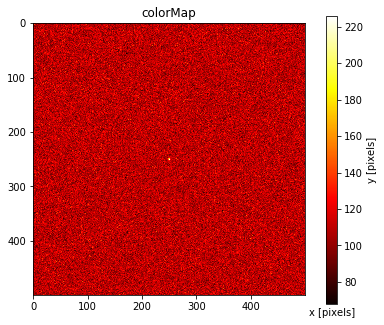

In [9]:
visualize(tot_signal)

Distribution of Intensity in a Subplot
--------------------------------
1. generate a number of signals with and without atom
2. choose a box around the center
3. plot histogram for intensity
4. create plot for each SNR
5. find threshold line as a function of SNR
6. plot fidelity by applying the model to a set of testing data

100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
100000.0
time used: 3.9524993896484375


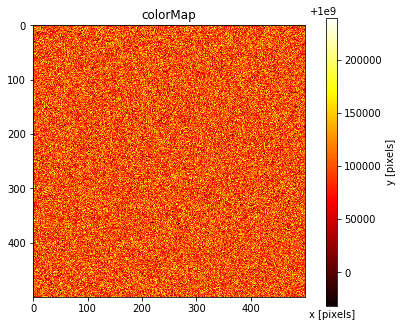

label: 0


In [10]:
# 1
# takes more than 1 hr to compute 1000 data samples for img_size == 500
# need to optimize for speed
prev_time = time.time()
data_tr, labels_tr = generate_training_data(img_size, 100, 0.001)
print(f"time used: {time.time() - prev_time}")
visualize(data_tr[0])
print(f"label: {labels_tr[0]}")

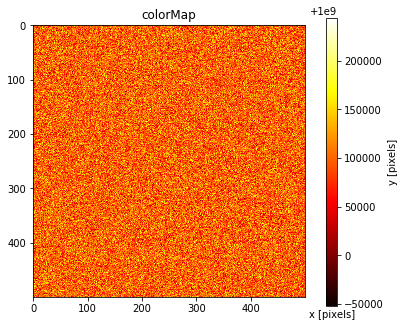

0


In [11]:
idx = 2
visualize(data_tr[idx])
print(labels_tr[idx])

(array([3., 2., 0., 0., 2., 2., 2., 1., 1., 3., 4., 2., 5., 2., 1., 2., 2.,
        6., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 2., 0., 3., 3., 3., 2., 4., 4., 1.,
        1., 0., 4., 3., 1., 3., 5., 2., 2., 2., 2., 2., 1., 2., 1.]),
 array([1.00994846e+09, 1.00995267e+09, 1.00995688e+09, 1.00996110e+09,
        1.00996531e+09, 1.00996952e+09, 1.00997373e+09, 1.00997795e+09,
        1.00998216e+09, 1.00998637e+09, 1.00999059e+09, 1.00999480e+09,
        1.00999901e+09, 1.01000323e+09, 1.01000744e+09, 1.01001165e+09,
        1.01001586e+09, 1.01002008e+09, 1.01002429e+09, 1.01002850e+09,
        1.01003272e+09, 1.01003693e+09, 1.01004114e+09, 1.01004535e+09,
        1.01004957e+09, 1.01005378e+09, 1.01005799e+09, 1.01006221e+09,
        1.01006642e+09, 1.01007063e+09, 1.0100

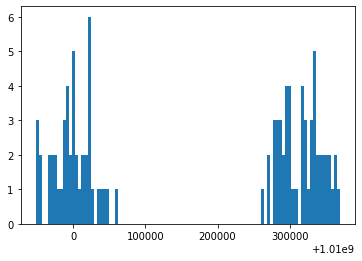

In [12]:
# 2, 3
luminosity = box_luminosity(data_tr, 100, 200, 200)
plt.hist(luminosity, bins=100)

In [13]:
# 4
# take ten different values of snr
snr_values = np.linspace(0.5, 10, 10)
luminosities = []
figure, axs = plt.subplots(5,2, figsize=(15, 15))
figure.tight_layout(pad=3.0)
for idx, snr in enumerate(snr_values):
    data_tr, labels_tr = generate_training_data(img_size, 100, snr)
    luminosity = box_luminosity(data_tr, 100, 200, 200)
    luminosities.append(luminosity)

    ax = axs[idx//2, idx%2]
    ax.hist(luminosity, bins=100, histtype='step')
    ax.set_xlabel("luminosity")    
    ax.set_ylabel("count")
    ax.set_title("SNR={:.2f}".format(snr))

200.0
64.28571428571428
38.29787234042553


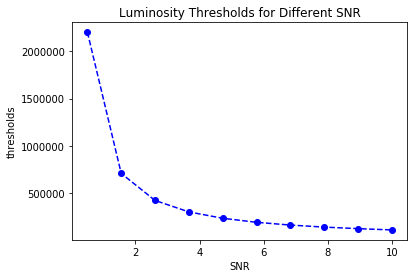

In [14]:
# 5
thresholds = [] 
for l in luminosities:
    thresholds.append(find_threshold(l))
    
thresholds = np.array(thresholds)
# plot thresholds against snr
plt.plot(snr_values, thresholds, linestyle='--', marker='o', color='b')
plt.xlabel("SNR")
plt.ylabel("thresholds")
plt.title("Luminosity Thresholds for Different SNR")
plt.show()

In [15]:
# 6
# generate validation data and labels:
for l in luminosities:
data_val, labels_val = generate_training_data(img_size, 50, )

IndentationError: expected an indented block (<ipython-input-15-e6639e0728a8>, line 4)